# Assignment 3




Due by 11:59pm, Apr. 17, 2024


**Name: DEBASRITA SARKAR**

**CWID: A20544597**

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. The below shows the input image and a kernel filter. Please compute the convolution of the input image with the kernel filter, stride =1.

Input:

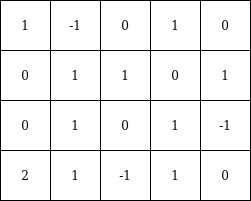

Kernel:

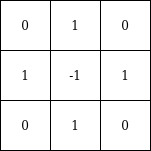

a)With zero padding and padding=1.

b)Without padding.






**Answer:**

***
a)
**With zero padding and stride = 1:**

The value for (0,0) cell of feature map: 0+0+0+0-1-1+0+0+0 = -2

The value for (0,1) cell of feature map: 0+0+0+1+1+0+0+1+0 = 3

The value for (0,2) cell of feature map: 0+0+0-1+0+1+0+1+0 = 1

The value for (0,3) cell of feature map: 0+0+0+0-1+0+0+0+0 = -1

The value for (0,4) cell of feature map: 0+0+0+1+0+0+0+1+0 = 2

The value for (1,0) cell of feature map: 0+1+0+0+0+1+0+0+0 = 2

The value for (1,1) cell of feature map: 0-1+0+0-1+1+0+1+0 = 0

The value for (1,2) cell of feature map: 0+0+0+1-1+0+0+0+0 = 0

The value for (1,3) cell of feature map: 0+1+0+1+0+1+0+1+0 = 4

The value for (1,4) cell of feature map: 0+0+0+0-1+0+0-1+0 = -2

The value for (2,0) cell of feature map: 0+0+0+0+0+1+0+2+0 = 3

The value for (2,1) cell of feature map: 0+1+0+0-1+0+0+1+0 = 1

The value for (2:2) cell of feature map: 0+1+0+1+0+1+0-1+0 = 2

The value for (2,3) cell of feature map: 0+0+0+0-1-1+0+1+0 = -1

The value for (2,4) cell of feature map: 0+1+0+1+1+0+0+0+0 = 3

The value for (3,0) cell of feature map: 0+0+0+0-2+1+0+0+0 = -1 

The value for (3,1) cell of feature map: 0+1+0+2-1-1+0+0+0 = 1

The value for (3,2) cell of feature map: 0+0+0+1+1+1+0+0+0 = 3

The value for (3,3) cell of feature map: 0+1+0-1-1+0+0+0+0 = -1

The value for (3,4) cell of feature map: 0-1+0+1+0+0+0+0+0 = 0

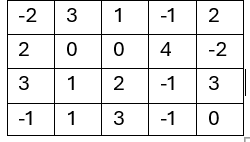




**b)**

**Stride = 1**

The value for (0,0) cell of feature map: 0-1+0+0-1+1+0+1+0 = 0

The value for (0,1) cell of feature map: 0+0+0+1-1+0+0+0+0 = 0

The value for (0,2) cell of feature map: 0+1+0+1+0+1+0+1+0 = 4

The value for (1,0) cell of feature map: 0+1+0+0-1+0+0+1+0 = 1

The value for (1,1) cell of feature map: 0+1+0+1+0+1+0-1+0 = 2

The value for (1,2) cell of feature map: 0+0+0+0-1-1+0+1+0 =-1


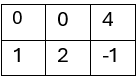




2. Let I be the input. Write the output using average pooling with 2X2 filter, stride = 2.


I:

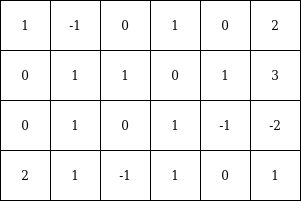




**Answer:**

***
The value for (0,0) cell: 0.25

The value for (0,1) cell: 0.5

The value for (0,2) cell: 1.5

The value for (1,0) cell: 1 

The value for (1,1) cell: 0.25 

The value for (1,2) cell: -0.5


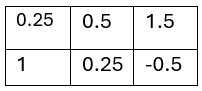

3. Assume there is a tensor with a size of (2, 32, 64, 64) for (batch size, channels, height, width) as input and a convolution layer with output channel = 64, kernel size = 3x3. What is the number of parameters of this convolution layer with and without the bias?





**Answer:**

**Without bias:**

Number of parameters = (Kernel size)×(Input channels)×(Output channels)

**With bias:**

Number of parameters = (Kernel size)×(Input channels)×(Output channels)+(Output channels)

In this case,

Kernel size = 3×3

Input channels = 32

Output channels = 64

Therefore, 

Number of parameters without bias = (3×3) × 32 × 64 
                     
                                = 18432 
                     
Number of parameters with bias = [(3×3) × 32 × 64] + 64 
                                     
                             = 18496
***

## Programming Questions (Question 4: 40 points, Question 5, 40 points)

In [ ]:
# Load MNIST dataset. DO NOT modify the below code.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

4. Training an image classifier for MNIST dataset by MLP layers and convolutional layers.
----------------------------

Please finish the following steps in order:

*   Load and normalize the MNIST dataset.
*   Split the data into training, validation and testing set.
*   Define a model with several multi-layer perceptron layers(MLP). Don’t use convolution layers.
*   Define a loss function
*   Train the network on the training data
*   Plot the training loss and validation loss as a function of epochs.
*   Plot the both training accuracy and validation accuracy as a function of epochs.
*   Test the network on the test data via printing the testing accuracy.



Shape of X before normalization: (70000, 784)
Shape of y before normalization: (70000,)
Shape of X after normalization: (70000, 28, 28)
Shape of X_train: (42000, 28, 28)
Shape of X_val: (14000, 28, 28)
Shape of X_test: (14000, 28, 28)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                 

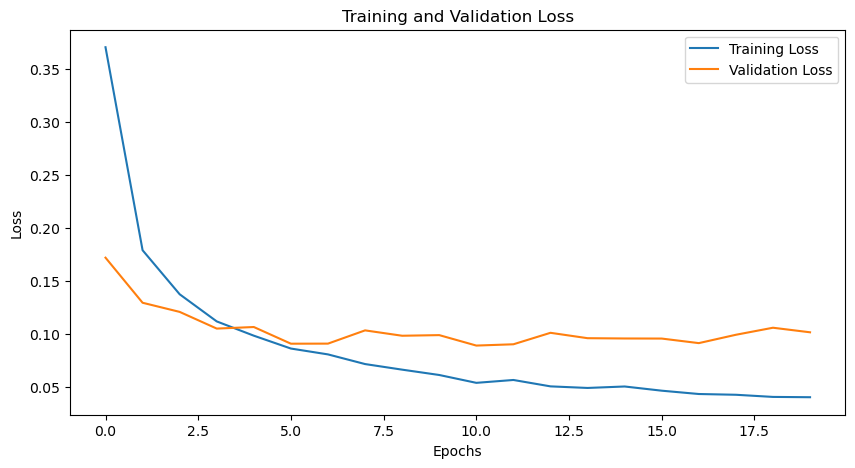

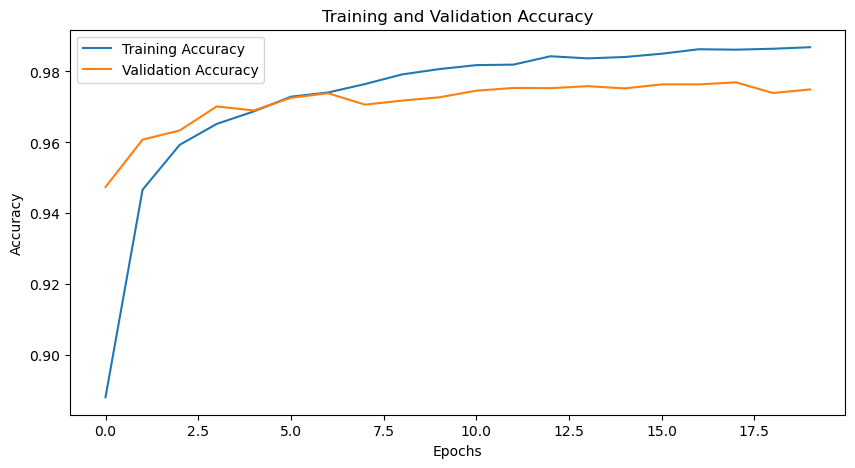

Testing Accuracy: 97.61%


In [10]:
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import matplotlib.pyplot as plt

# Display shape of datasets before normalization
print("Shape of X before normalization:", X.shape)
print("Shape of y before normalization:", y.shape)

# Reshape X
X_reshaped = X.reshape(-1, 28, 28)

# Normalize
X_train_normalized = X_reshaped / 255.0

# Display shape of datasets after normalization
print("Shape of X after normalization:", X_train_normalized.shape)

# Split the dataset into training, validation, and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_normalized, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

# Define cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False)
    return loss

# Define model
def create_model():
    model = tf.keras.models.Sequential([
        # Flatten layer to convert 2D input data into 1D
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        # Fully connected layers with activation functions and dropout regularization
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        # Output layer with softmax activation for classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss=cross_entropy_loss, 
                  metrics=['accuracy'])
    return model

# Create an instance of the model
mlp_model = create_model()

# Print model summary
mlp_model.summary()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


5. Please finish the following steps in order:


*   Define a model with several 2D convolution layers, pooling layers, activate function, and normalization layers.
*   Define the same loss function
*   Train the network on the training data
*   Plot the training loss and validation loss as a function of epochs.
*   Plot the both training accuracy and validation accuracy as a function of epochs.
*   Test the network on the test data via printing the testing accuracy, and Compare to the previous result.

Hints: the last dimension of data denotes a flattened tensor from 2D images, specifically [Batch size, HxW]. You can reshape the data to a shape of [Batch size, 1(channel), 28(H), 28(W)] as the input size for a convolution-based model.



Shape of X before normalization: (70000, 784)
Shape of y before normalization: (70000,)
Shape of X after normalization: (70000, 28, 28, 1)
Shape of X_train (56000, 28, 28, 1)
Shape of y_train (56000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                   

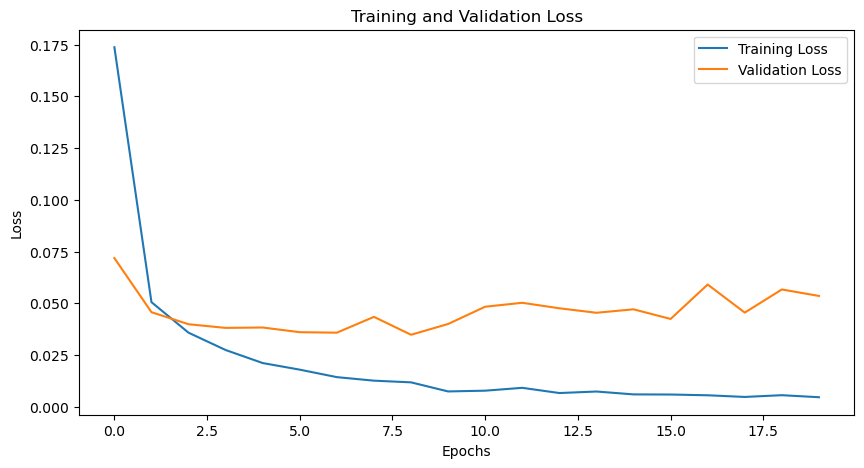

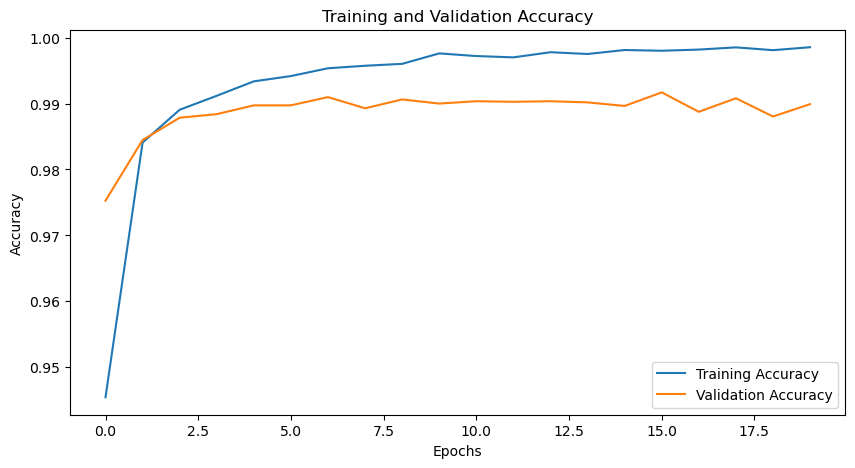

438/438 [==============================] - 2s 4ms/step - loss: 0.0556 - accuracy: 0.9900
Testing Accuracy: 99.00%


In [3]:
# Please write your codes

# Please write your codes
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import matplotlib.pyplot as plt

#Display shape of datasets before normalization
print("Shape of X before normalization:", X.shape)
print("Shape of y before normalization:", y.shape)

# Reshape X
X_reshaped = X.reshape(-1, 28, 28, 1)

#Normalize
X_train_normalized = X_reshaped/255.0
#X_test_normalized = y/255.0

# Display shape of datasets after normalization
print("Shape of X after normalization:", X_train_normalized.shape)
#print("Shape of y after normalization:", X_test_normalized.shape)

#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_normalized, y, test_size=0.2, random_state = 42)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

'''#Normalize
X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0
'''

#reshape
X_train_reshaped = X_train.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)

#Define model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])
    
    model.compile(optimizer='adam',
                  loss=cross_entropy_loss, 
                  metrics=['accuracy'])
    return model

# Create an instance of the model
mlp_model = create_model()

# Print model summary
mlp_model.summary()

#Loss function
def cross_entropy_loss(y_true, y_pred):
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False)
    return loss


# Create an instance of the model
#mlp_model = create_model()

#Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#testing on test data
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")



Based on accuracy we can conclude that MLP with convulation layer performs better than MLP without convolution layer.